In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon, MultiPolygon
import numpy as np
from scipy.stats import linregress

In [2]:
accident_data = pd.read_csv('data/CAIC_Accident_Data_Nov_2024.csv')
print(accident_data.head())

   AvyYear  YYYY  MM  DD                                           Location  \
0     2024  2024   5  10                   Donaldson Peak, Lost River Range   
1     2024  2024   5   9          Big Willow Aprons, northeast of Lone Peak   
2     2024  2024   3  29                                 Mount Saint Helens   
3     2024  2024   3  12  West Fork Camp Creek near Lost Trail Pass, Bit...   
4     2024  2024   3   6                   Gunsight Peak, Elkhorn Mountains   

  Setting State     lat      lon     PrimaryActivity TravelMode  Killed  \
0      BC    ID  44.064 -113.700  Backcountry Tourer       Foot       1   
1      BC    UT  40.532 -111.761  Backcountry Tourer       Foot       2   
2      BC    WA  46.191 -122.195  Backcountry Tourer       Foot       1   
3      BC    MT  45.704 -113.978  Backcountry Tourer        Ski       1   
4      BC    OR  44.961 -118.245  Backcountry Tourer        Ski       1   

                                         Description       Date  
0  1 bac

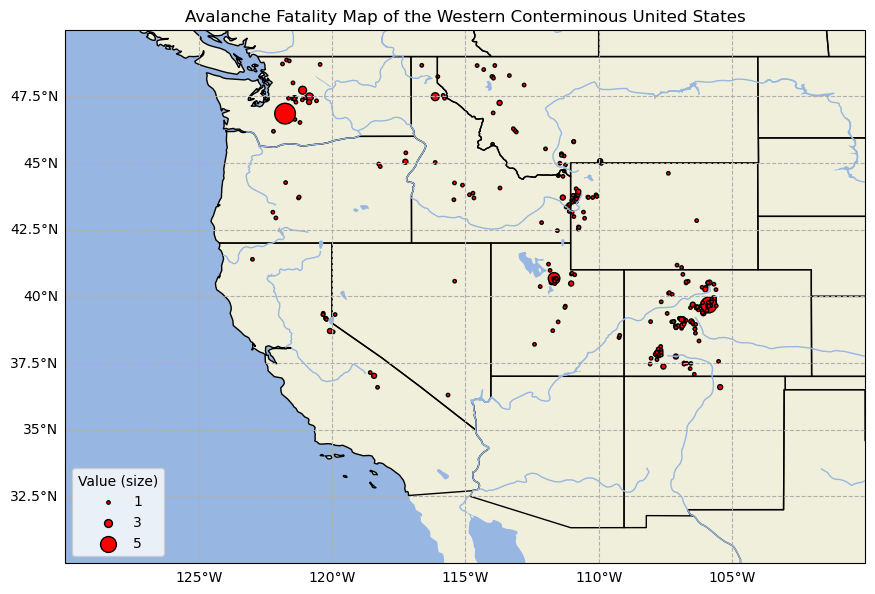

In [3]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_extent([-130, -100, 30, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

sc1 = ax.scatter(
    accident_data['lon'], accident_data['lat'],
    c='r',                           # color by value
    s=5+accident_data['Killed']**3,  # marker size
    edgecolors='k',
    transform=ccrs.PlateCarree(),
    label=accident_data['Killed']
)

legend_vals = [1, 3, 5]
legend_sizes = [5+v**3 for v in legend_vals]

legend_handles = [
    plt.scatter([], [], s=s, edgecolors='k', facecolors='r', label=f"{v}")
    for s, v in zip(legend_sizes, legend_vals)
]

legend = ax.legend(
    handles=legend_handles,
    title="Value (size)",
    loc='lower left',
    scatterpoints=1,
    frameon=True
)

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('Avalanche Fatality Map of the Western Conterminous United States')
plt.show()

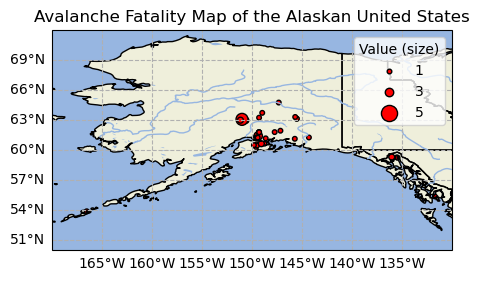

In [4]:
fig = plt.figure(figsize=(4, 8))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_extent([-170, -130, 50, 72], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

sc = ax.scatter(
    accident_data['lon'], accident_data['lat'],
    c='r',           # color by value
    s=10+accident_data['Killed']**3,                      # marker size
    edgecolors='k',
    transform=ccrs.PlateCarree()
)

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

legend_vals = [1, 3, 5]
legend_sizes = [10+v**3 for v in legend_vals]

legend_handles = [
    plt.scatter([], [], s=s, edgecolors='k', facecolors='r', label=f"{v}")
    for s, v in zip(legend_sizes, legend_vals)
]

legend = ax.legend(
    handles=legend_handles,
    title="Value (size)",
    loc='upper right',
    scatterpoints=1,
    frameon=True
)

plt.title('Avalanche Fatality Map of the Alaskan United States')
plt.show()

In [5]:
# load the CSV file
av_data = pd.read_csv('data/avalanche-record-CAIC.csv')
av_data = av_data[av_data['latitude'] != ' -']
av_data['latitude'] = av_data['latitude'].astype('float64')
av_data['Longitude'] = av_data['Longitude'].astype('float64')

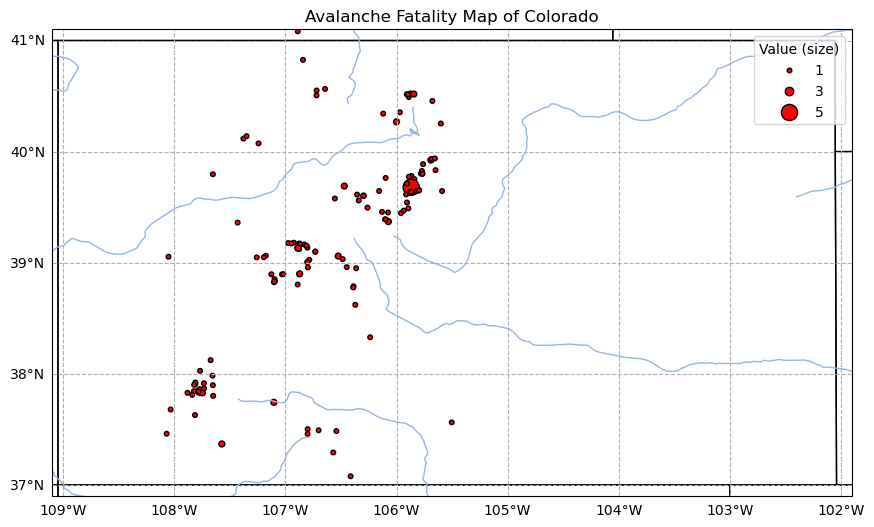

In [6]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_extent([-109.1, -101.9, 36.9, 41.1], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black')
# ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

sc = ax.scatter(
    accident_data['lon'], accident_data['lat'],
    c='r',           # color by value
    s=10+accident_data['Killed']**3,                      # marker size
    edgecolors='k',
    transform=ccrs.PlateCarree()
)

legend_vals = [1, 3, 5]
legend_sizes = [10+v**3 for v in legend_vals]

legend_handles = [
    plt.scatter([], [], s=s, edgecolors='k', facecolors='r', label=f"{v}")
    for s, v in zip(legend_sizes, legend_vals)
]

legend = ax.legend(
    handles=legend_handles,
    title="Value (size)",
    loc='upper right',
    scatterpoints=1,
    frameon=True
)

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('Avalanche Fatality Map of Colorado')
plt.show()

In [7]:
accident_data

,AvyYear,YYYY,MM,DD,Location,Setting,State,lat,lon,PrimaryActivity,TravelMode,Killed,Description,Date
0,2024,2024,5,10,"Donaldson Peak, Lost River Range",BC,ID,44.064,-113.700,Backcountry Tourer,Foot,1,"1 backcountry skier caught, fully buried, and ...",5/10/2024
1,2024,2024,5,9,"Big Willow Aprons, northeast of Lone Peak",BC,UT,40.532,-111.761,Backcountry Tourer,Foot,2,"3 backcountry skiers caught, 1 partially burie...",5/9/2024
2,2024,2024,3,29,Mount Saint Helens,BC,WA,46.191,-122.195,Backcountry Tourer,Foot,1,1 backcountry snowboarder caught and killed,3/29/2024
3,2024,2024,3,12,"West Fork Camp Creek near Lost Trail Pass, Bit...",BC,MT,45.704,-113.978,Backcountry Tourer,Ski,1,1 backcountry skier caught and killed,3/12/2024
4,2024,2024,3,6,"Gunsight Peak, Elkhorn Mountains",BC,OR,44.961,-118.245,Backcountry Tourer,Ski,1,1 backcountry skier caught and killed,3/6/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,1952,1952,1,19,SUN VALLEY,SA,ID,0.000,0.000,Inbounds Rider,Ski,4,NaN,1/19/1952
992,1952,1952,1,14,TWIN BRIDGES,RS,CA,0.000,0.000,Resident,Foot,2,NaN,1/14/1952
993,1952,1952,1,7,SILVERTON,RD,CO,0.000,0.000,Miner,NaN,1,NaN,1/7/1952
994,1952,1951,12,30,WOLF CREEK PASS,RD,CO,0.000,0.000,Motorist,NaN,2,NaN,12/30/1951


In [8]:
activity_map = {
    'Mechanised Guide':'Mechanized Guiding',
    'Mechanized Guide':'Mechanized Guiding',
    'Mechanized Guided Client':'Mechanized Guiding',
    'Mechanized Guided client':'Mechanized Guiding',
    'Mechanized Guiding Client':'Mechanized Guiding'
}

accident_data['PrimaryActivity'] = accident_data['PrimaryActivity'].replace(activity_map)

comparison = accident_data.pivot_table(index='AvyYear', columns='PrimaryActivity', aggfunc='size', fill_value=0)
comparison_cleaned = comparison[['Backcountry Tourer','Climber', 'Hiker','Snowmobiler']]
comparison_cleaned_smoothed = comparison_cleaned.rolling(window=4, min_periods=1).mean()


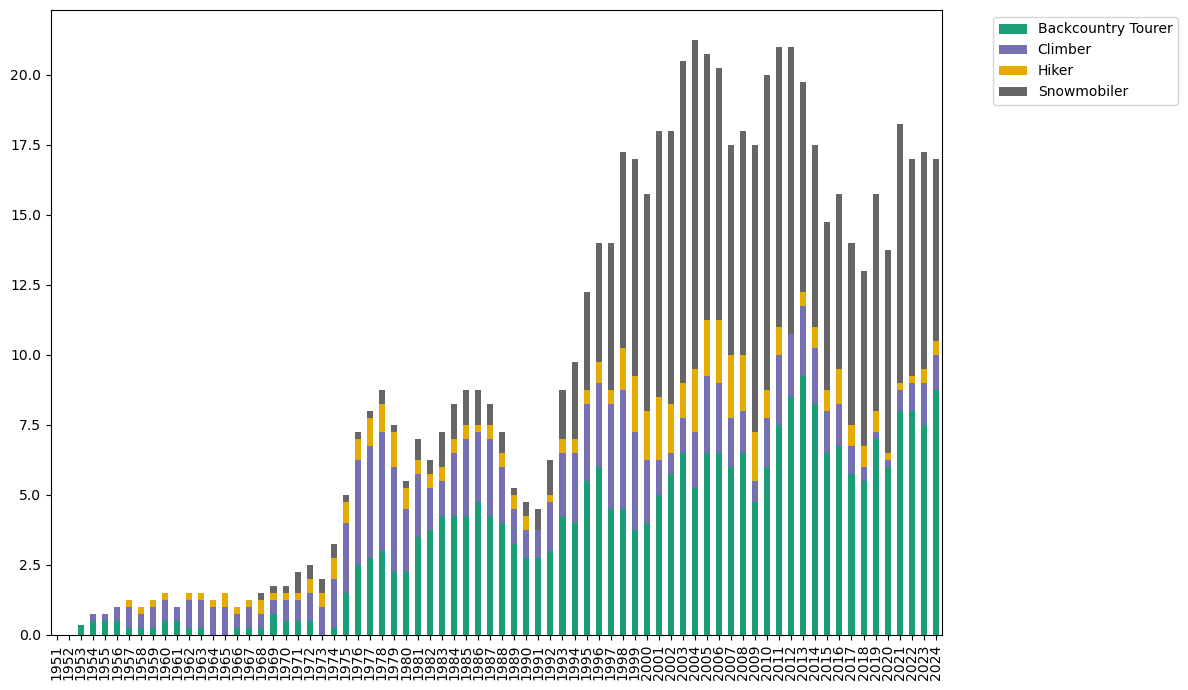

In [9]:
ax = comparison_cleaned_smoothed.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Dark2')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

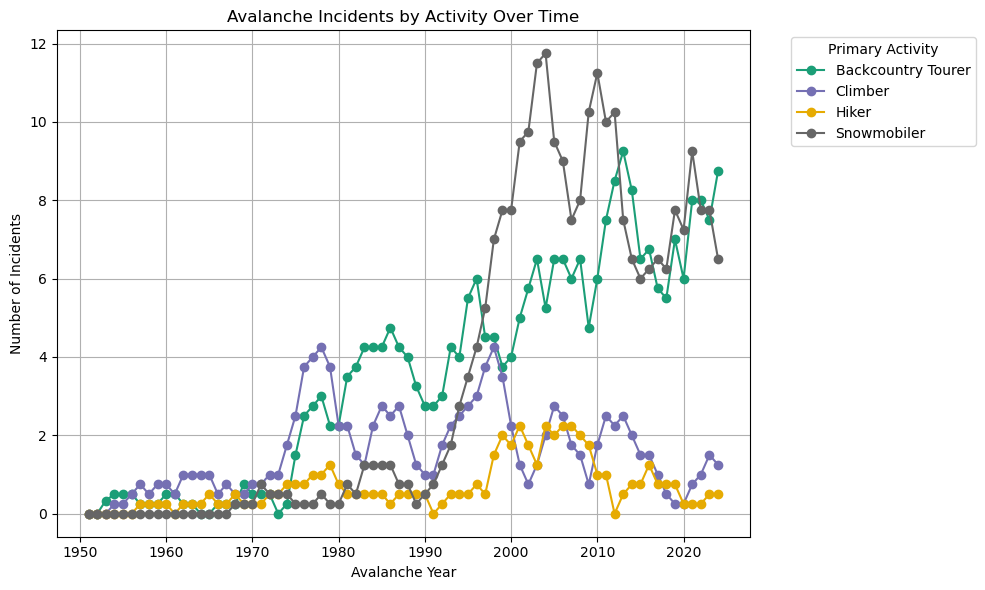

In [10]:
ax = comparison_cleaned_smoothed.plot(marker='o', figsize=(10, 6), cmap='Dark2')
plt.title("Avalanche Incidents by Activity Over Time")
plt.xlabel("Avalanche Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.legend(title="Primary Activity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

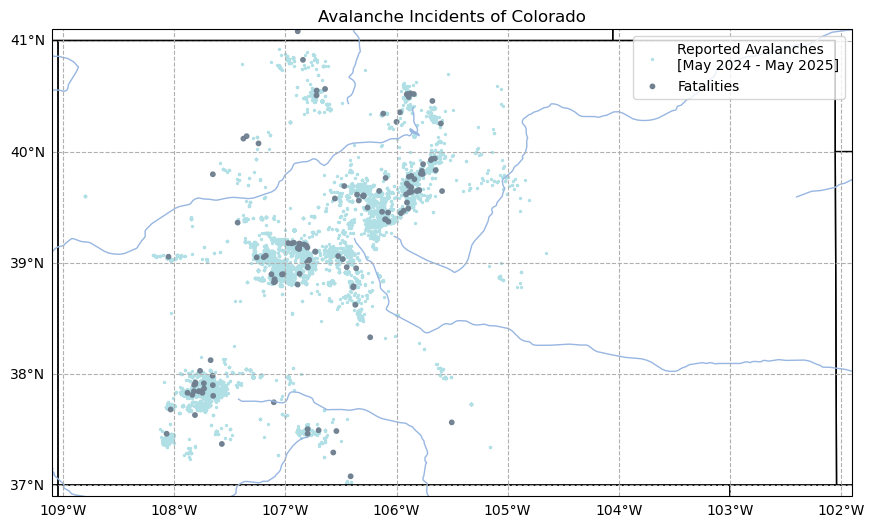

In [11]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_extent([-109.1, -101.9, 36.9, 41.1], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black')
# ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

sc1 = ax.scatter(
    av_data['Longitude'], av_data['latitude'],
    c='powderblue',           # color by value
    s=2,                      # marker size
    # edgecolors='k',
    label='Reported Avalanches \n[May 2024 - May 2025]',
    transform=ccrs.PlateCarree()
)

alphas = 1 - (np.sqrt(2025**2 - accident_data['AvyYear']**2 ) / 74**2)

sc2 = ax.scatter(
    accident_data['lon'], accident_data['lat'],
    c='slategrey',           # color by value
    s=10,                      # marker size
    # edgecolors='k',
    alpha=alphas,
    label='Fatalities',
    transform=ccrs.PlateCarree()
)

ax.legend(loc='best'
)

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('Avalanche Incidents of Colorado')
plt.show()

In [12]:
# Step 2: Create a pivot table
damage_counts = av_data.pivot_table(index='Area', columns='sizeD', aggfunc='size', fill_value=0)

damage_counts['NA'] = damage_counts[[' -', ' U', ' Unkn']].sum(axis=1)
damage_counts = damage_counts.drop(columns=[' U',' -',' Unkn'])

damage_counts = damage_counts.loc[damage_counts.sum(axis=1).sort_values(ascending=False).index]
damage_counts

sizeD,D1,D1.5,D2,D2.5,D3,D3.5,D4,D5,NA
Area,,,,,,,,,
Gunnison,1192,1016,1776,413,277,38,55,0,58
Northern San Juan,1112,931,2039,350,149,14,27,0,58
Front Range,1399,941,890,183,46,8,10,0,110
Aspen,821,748,1269,325,157,25,18,0,38
Vail & Summit County,1017,686,980,168,74,8,11,0,69
Sawatch,579,486,758,134,51,31,19,0,41
Southern San Juan,360,474,771,144,33,4,11,1,8
Steamboat & Flat Tops,239,98,98,9,5,0,0,0,26
Grand Mesa,133,61,66,0,0,0,0,0,3


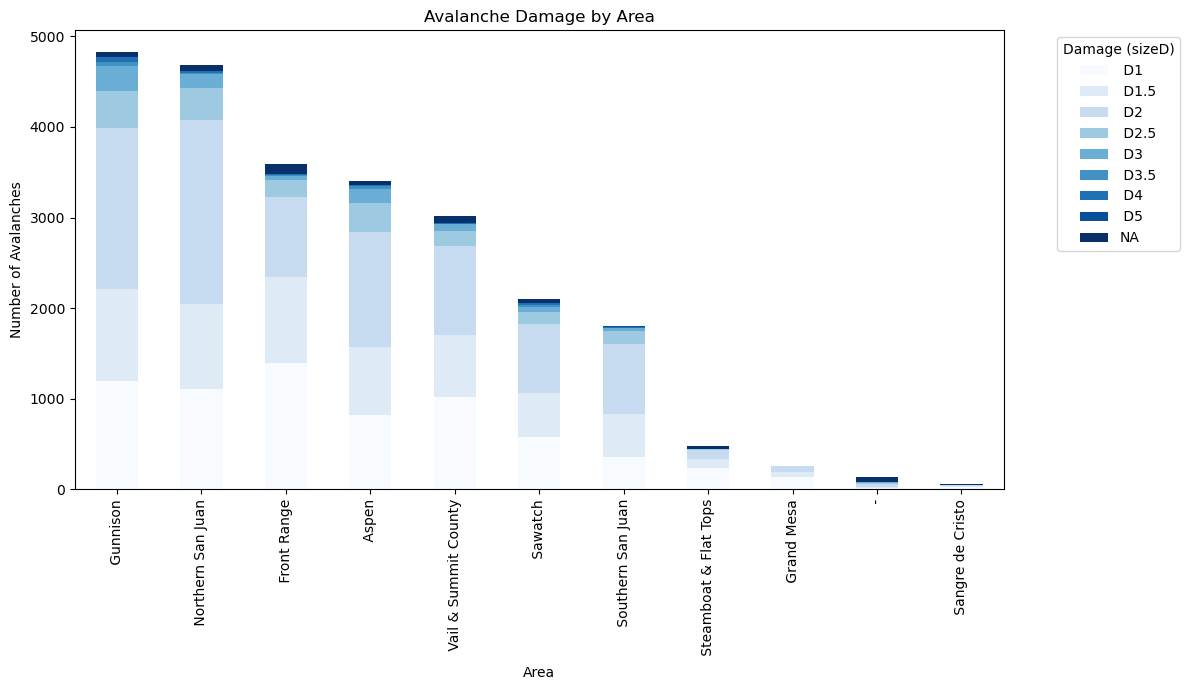

In [13]:
ax = damage_counts.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Blues')

# Step 4: Add labels and title
plt.xlabel('Area')
plt.ylabel('Number of Avalanches')
plt.title('Avalanche Damage by Area')
plt.legend(title='Damage (sizeD)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [14]:
gdf = gpd.read_file('data/dtl_cnty.shp')
gdf

,NAME,STATE_NAME,STATE_ABBR,STATE_FIPS,COUNTY_FIP,FIPS,POPULATION,POP_SQMI,SQMI,geometry
0,Alamosa County,Colorado,CO,08,003,08003,16605,23.0,723.29,"POLYGON ((-105.59629 37.7521, -105.53338 37.75..."
1,Chaffee County,Colorado,CO,08,015,08015,20202,19.9,1014.95,"POLYGON ((-106.45739 39.05691, -106.38907 39.0..."
2,Clear Creek County,Colorado,CO,08,019,08019,9412,23.7,396.34,"POLYGON ((-105.67828 39.84728, -105.67793 39.8..."
3,Conejos County,Colorado,CO,08,021,08021,7347,5.7,1290.99,"POLYGON ((-106.65386 37.40326, -106.64782 37.4..."
4,Costilla County,Colorado,CO,08,023,08023,3433,2.8,1231.00,"POLYGON ((-105.29518 37.65353, -105.29411 37.6..."
5,Eagle County,Colorado,CO,08,037,08037,56139,33.2,1691.79,"POLYGON ((-106.57896 39.92495, -106.57876 39.9..."
6,Grand County,Colorado,CO,08,049,08049,15876,8.5,1869.57,"POLYGON ((-105.84697 40.48279, -105.84567 40.4..."
7,Gunnison County,Colorado,CO,08,051,08051,17367,5.3,3259.63,"POLYGON ((-107.42633 39.25767, -107.42556 39.2..."
8,Hinsdale County,Colorado,CO,08,053,08053,774,0.7,1123.15,"POLYGON ((-107.56268 38.14711, -107.56021 38.1..."
9,Jackson County,Colorado,CO,08,057,08057,1340,0.8,1620.96,"POLYGON ((-106.74935 41.00269, -106.74169 41.0..."


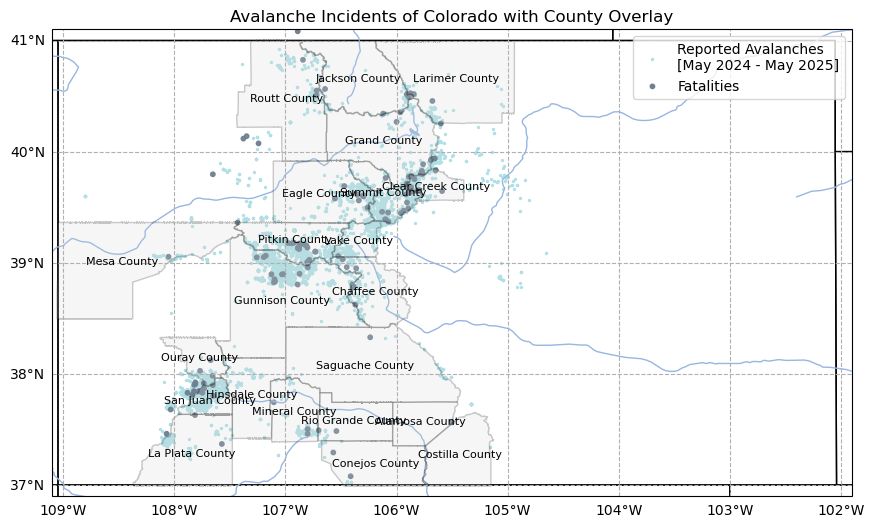

In [15]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_extent([-109.1, -101.9, 36.9, 41.1], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

for _, row in gdf.iterrows():
    geom = row.geometry
    label = row['NAME']  # Replace 'NAME' with your actual column

    # Plot shape
    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor='lightgray', edgecolor='black', alpha=0.2)

    # Compute centroid for label
    centroid = geom.centroid
    ax.text(centroid.x, centroid.y, label,
            transform=ccrs.PlateCarree(),
            ha='center', va='center', fontsize=8)

sc1 = ax.scatter(
    av_data['Longitude'], av_data['latitude'],
    c='powderblue',           # color by value
    s=2,                      # marker size
    # edgecolors='k',
    label='Reported Avalanches \n[May 2024 - May 2025]',
    transform=ccrs.PlateCarree()
)

alphas = 1 - (np.sqrt(2025 - accident_data['AvyYear'] ) / 74)

sc2 = ax.scatter(
    accident_data['lon'], accident_data['lat'],
    c='slategrey',           # color by value
    s=10,                      # marker size
    # edgecolors='k',
    alpha=alphas,
    label='Fatalities',
    transform=ccrs.PlateCarree()
)

ax.legend(loc='best'
)

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('Avalanche Incidents of Colorado with County Overlay')
plt.show()

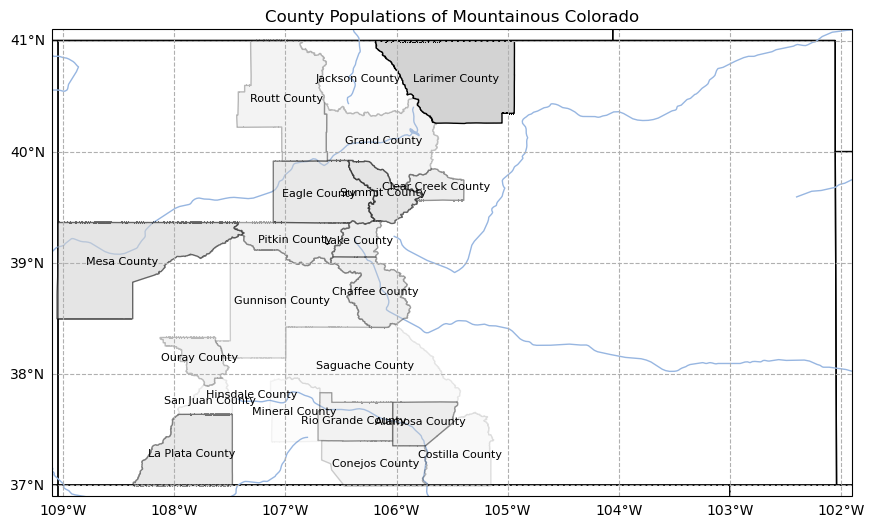

In [16]:
pop_min = gdf['POP_SQMI'].min()
pop_max = gdf['POP_SQMI'].max()
gdf['alpha'] = (gdf['POP_SQMI'] - pop_min) / (pop_max - pop_min)

fig = plt.figure(figsize=(8, 12))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_extent([-109.1, -101.9, 36.9, 41.1], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

for _, row in gdf.iterrows():
    geom = row.geometry
    label = row['NAME']  # Replace 'NAME' with your actual column
    alpha_val = row['alpha']

    
    # Plot shape
    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor='lightgray', edgecolor='black', alpha=np.sqrt(alpha_val))

    # Compute centroid for label
    centroid = geom.centroid
    ax.text(centroid.x, centroid.y, label,
            transform=ccrs.PlateCarree(),
            ha='center', va='center', fontsize=8)

gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('County Populations of Mountainous Colorado')
plt.show()

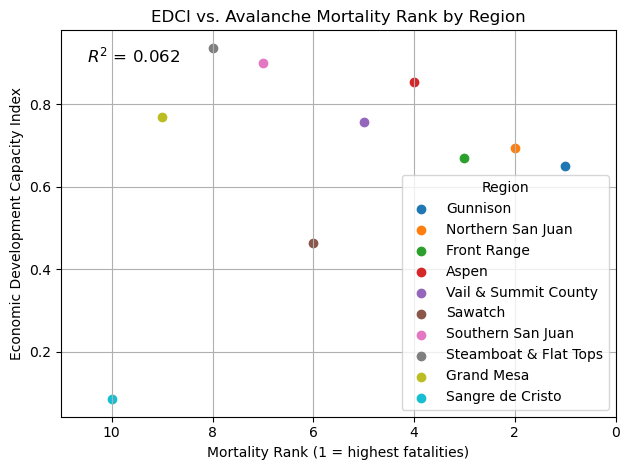

In [29]:
data_ec = {'Area':['Gunnison',
                    'Northern San Juan',
                    'Front Range',
                    'Aspen',
                    'Vail & Summit County',
                    'Sawatch',
                    'Southern San Juan',
                    'Steamboat & Flat Tops',
                    'Grand Mesa',
                    'Sangre de Cristo'
                  ],
           'EDCI':[0.6492,0.6940,0.6683,0.8538,0.7575,0.4645,0.8985,0.9362,0.7684,0.0853],
           'Mortality Rank':[1,2,3,4,5,6,7,8,9,10]
          }
df = pd.DataFrame(data_ec)

slope, intercept, r_value, p_value, std_err = linregress(df['Mortality Rank'], df['EDCI'])
line = slope * df['Mortality Rank'] + intercept

for i in range(len(df)):
    plt.scatter(
        df['Mortality Rank'][i],
        df['EDCI'][i],
        label=df['Area'][i]
    )

plt.text(10.5, 0.9, f"$R^2$ = {r_value**2:.3f}", fontsize=12)

plt.title('EDCI vs. Avalanche Mortality Rank by Region')
plt.xlabel('Mortality Rank (1 = highest fatalities)')
plt.xlim(11,0)
plt.ylabel('Economic Development Capacity Index')
plt.grid(True)
plt.legend(loc='lower right', title='Region')
plt.tight_layout()
plt.show()